# Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [17]:
df=pd.read_csv("C:\\Users\\sarit\\Downloads\\Algorithms_projects\\train.csv")

C:\Common Files\New folder\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [19]:
df.duplicated().sum()

0

In [20]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [21]:
df[["Age"]]

,Age
0,23
1,23
2,-500
3,23
4,23
...,...
99995,25
99996,25
99997,25
99998,25


# Data Preprocessing

In [22]:
def handleobj(value):
    if '_'  in value :
        value = value.replace('_','')
        return float(value)
    elif "-" in value:
        value=value.replace("-",'')
        return float(value)
    else:
        return float(value)

In [23]:
df["Age"]=df["Age"].apply(handleobj)


In [24]:
df["Age"].unique()

array([  23.,  500.,   28., ..., 4808., 2263., 1342.])

In [25]:
df.loc[df["Age"]>100].index

Int64Index([    2,    56,   113,   122,   219,   243,   288,   289,   301,
              328,
            ...
            99762, 99776, 99873, 99877, 99908, 99913, 99937, 99950, 99963,
            99972],
           dtype='int64', length=2776)

In [26]:
df.drop(df.loc[df["Age"]>100].index,inplace=True)

In [27]:
df["Age"].unique()

array([ 23.,  28.,  34.,  54.,  55.,  21.,  31.,  33.,  30.,  24.,  44.,
        45.,  40.,  41.,  32.,  35.,  36.,  39.,  37.,  20.,  46.,  26.,
        42.,  19.,  48.,  38.,  43.,  22.,  16.,  18.,  15.,  27.,  25.,
        14.,  17.,  47.,  53.,  56.,  29.,  49.,  51.,  50.,  52.,  99.,
       100.,  95.])

In [28]:
df["Annual_Income"].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [29]:
df["Annual_Income"]=df["Annual_Income"].apply(handleobj)

In [30]:
df["Annual_Income"].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [31]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [32]:
df["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '1017', '945', '146', '563', '341', '720', '1485',
       '49', '737', '1106', '466', '728', '313', '597_', '119', '663',
       '640', '92_', '1019', '501', '1302', '39', '716', '848', '931',
       '1214', '186', '424', '1001', '1110', '1152', '457', '1433',
       '1187', '52', '1480', '1047', '1035', '1347_', '33', '193', '699',
       '329', '1451', '484', '649', '995', '545', '684', '1135', '1094',
       '1204', '654', '58', '348', '614', '1363', '323', '1406', '1348',
       '430', '153', '1461', '905', '1312', '1424', '1154', '95', '1353',
       '1228', '819', '1006', '795', '359', '1209', '590', '696', '1185_',
       '1465', '911', '70', '816', '1369', '143', '1416', '455', '55',
       '1096', '1474', '420', '904', '89', '1259', '527', '1241', '449',
       '983', '418', '319', '23', '238', '638', '138', '23

In [33]:
df["Num_of_Loan"]=df["Num_of_Loan"].apply(handleobj)

In [34]:
df["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '14', '11', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '26', '11_', '3104', '21_', '25', '10_',
       '183_', '1106', '834', '19_', '24_', '17_', '23_', '2672', '20_',
       '4_', '2008', '-3', '538', '6_', '1_', '16_', '27', '3478', '2420',
       '15_', '707', '708', '26_', '18_', '3815', '9_', '28', '5_', '-2',
       '1867', '2250', '1463', '25_', '7_', '2882', '1941', '2655',
       '2628', '132', '3069', '306', '0_', '3539', '3684', '1823', '4128',
       '1946', '827', '2297', '2566', '904', '182', '929', '3568', '2503',
       '1552', '2812', '1697', '3764', '851', '3905', '923', '88', '1668',
       '3253', '808', '2689', '3858', '642', '3457', '1402', '1732',
       '3154', '847', '3037', '2204', '3103', '1063', '2056', '1282',
       '1841', '2569_', '211', '793', '3484', '411', '34

In [35]:
(df.isna().sum()/df.shape[0])*100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                         9.994446
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.013783
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.392249
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.018843
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         1.960421
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.043035
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.468033
Payment_Behaviour            0.000000
Monthly_Bala

# Handling Missing Values

In [36]:
df.Monthly_Inhand_Salary.fillna(df.Monthly_Inhand_Salary.median(),inplace=True)

In [37]:
df.Type_of_Loan .fillna(df.Type_of_Loan .mode(),inplace=True)

In [38]:
df.Num_of_Delayed_Payment.fillna(df.Num_of_Delayed_Payment.mode(),inplace=True)

In [39]:
df.dropna(inplace=True)

In [40]:
df.isna().sum()


ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [41]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].apply(handleobj)


In [42]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [43]:
df["Changed_Credit_Limit"].unique()

array(['11.27', '6.27', '9.27', ..., '-0.6000000000000001',
       '12.670000000000002', '25.16'], dtype=object)

In [44]:
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors='coerce')

In [45]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [46]:
df["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [47]:
df.replace(df.loc[df["Credit_Mix"]=="_"],df["Credit_Mix"].mode(),inplace=True)

In [48]:
df["Outstanding_Debt"].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [49]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].apply(handleobj)

In [50]:
df["Credit_History_Age"].unique()

array(['22 Years and 1 Months', '22 Years and 4 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 4 Months',
       '17 Years and 3 Months', '17 Years and 4 Months',
       '17 Years and 5 Months', '17 Years and 6 Months',
       '17 Years and 7 Months', '17 Years and 8 Months',
       '17 Years and 10 Months', '30 Years and 7 Months',
       '30 Years and 8 Months', '30 Years and 9 Months',
       '30 Years and 10 Months', '30 Years and 11 Months',
       '31 Years and 0 Months', '31 Years and 1 Months',
       '31 Years and 2 Months', '14 Years and 8 Months',
       '14 Years and 9 Months', '14 Years and 10 Months',
       '15 Years and 1 Mo

In [51]:
df["Payment_of_Min_Amount"].unique()  

array(['No', 'NM', 'Yes'], dtype=object)

In [ ]:
df["Amount_invested_monthly"].unique()

# Data Transformation

In [53]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors='coerce')

In [54]:
df["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [55]:
df.replace(df.loc[df["Payment_Behaviour"]=="!@9#%8"],df["Payment_Behaviour"].mode(),inplace=True)

In [56]:
df["Monthly_Balance"].unique()

array(['312.49408867943663', '223.45130972736786', '340.4792117872438',
       ..., 496.651610435322, 516.8090832742814, 393.6736955618808],
      dtype=object)

In [57]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors='coerce')

In [58]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [59]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

# Exploratory Data Analysis

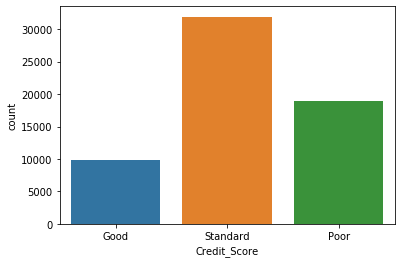

In [60]:
sns.countplot(x=df.Credit_Score)

C:\Common Files\New folder\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Common Files\New folder\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Common Files\New folder\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a nu

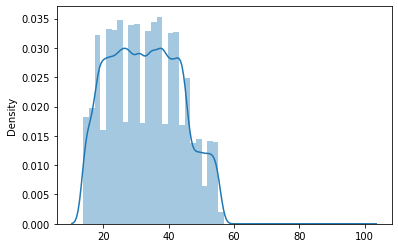

In [61]:
sns.distplot(x=df.Age)

C:\Common Files\New folder\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Common Files\New folder\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Common Files\New folder\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a nu

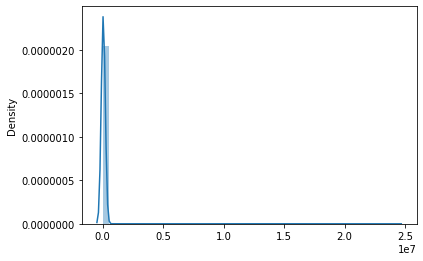

In [62]:
sns.distplot(x=df.Annual_Income)

In [63]:
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3095.978333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3095.978333,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard


In [64]:
df.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [65]:
#dropping unnecessary columns
df.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Delay_from_due_date','Payment_Behaviour'],axis=1,inplace=True)

In [66]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,312.494089,Good
3,23.0,Scientist,19114.12,3095.978333,3,4,3,4.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,223.451310,Good
5,23.0,Scientist,19114.12,3095.978333,3,4,3,4.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,340.479212,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,244.565317,Good
8,28.0,_______,34847.84,3037.986667,2,4,6,1.0,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,470.690627,Standard


In [67]:
df.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [68]:
df.loc[df["Occupation"]=="_______"].index

Int64Index([    8,    16,    20,    29,    59,    82,   157,   173,   212,
              226,
            ...
            99672, 99688, 99689, 99760, 99773, 99889, 99912, 99920, 99935,
            99989],
           dtype='int64', length=4265)

In [69]:
#dropping the blank occupation
df.drop(df.loc[df["Occupation"]=="_______"].index,inplace=True)

In [70]:
x = r'(\d+) Years and (\d+) Months'

df[['Years', 'Months']] = df['Credit_History_Age'].str.extract(x)


df[['Years', 'Months']] = df[['Years', 'Months']].fillna(0).astype(int)

In [71]:
df.drop(['Credit_History_Age'],axis=1,inplace=True)

In [72]:
df.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [73]:
#
df.drop(df.loc[df["Credit_Mix"]=="_"].index,inplace=True)

In [74]:
df.shape

(44996, 21)

In [75]:
df.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
Years                         int32
Months                        int32
dtype: object

In [76]:
df.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

# One hot encoding 

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le=LabelEncoder()

In [79]:
df["Payment_of_Min_Amount"]=le.fit_transform(df["Payment_of_Min_Amount"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df["Credit_Mix"]=le.fit_transform(df["Credit_Mix"])

In [80]:
df.dtypes

Age                         float64
Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
Years                         int32
Months                        int32
dtype: object

In [81]:
df.dropna(inplace=True)

In [82]:
x=df.drop('Credit_Score',axis=1)


In [83]:
x.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Years                       0
Months                      0
dtype: int64

In [84]:
y=df.Credit_Score

# Data Splitting

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=51)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33632, 20)
(8408, 20)
(33632,)
(8408,)


# DecisionTree Classification

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
#criterion='gini',
#max_depth=None,
#min_samples_split=2,
#min_samples_leaf=1,
#max_features=None,
#max_leaf_nodes=None,
  

In [90]:
dt=DecisionTreeClassifier()

In [91]:
dt.fit(x_train,y_train)  # it is useful to train model

DecisionTreeClassifier()

In [92]:
pred=dt.predict(x_test)

In [93]:
pred[0:5]

array(['Good', 'Good', 'Good', 'Standard', 'Poor'], dtype=object)

In [94]:
y_test[0:5]

97448        Good
51386    Standard
66533    Standard
30593    Standard
27346        Poor
Name: Credit_Score, dtype: object

In [95]:
from sklearn.metrics import confusion_matrix,classification_report

In [96]:
print(confusion_matrix(pred,y_test))

[[ 806   87  462]
 [  65 1749  809]
 [ 444  780 3206]]


In [97]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

        Good       0.61      0.59      0.60      1355
        Poor       0.67      0.67      0.67      2623
    Standard       0.72      0.72      0.72      4430

    accuracy                           0.69      8408
   macro avg       0.67      0.66      0.66      8408
weighted avg       0.68      0.69      0.68      8408



In [98]:
dt=DecisionTreeClassifier(criterion="entropy",
max_depth=10,
min_samples_split=5,
min_samples_leaf=1,
max_features=10,
max_leaf_nodes=None,)

In [99]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_split=5)

In [100]:
pred1=dt.predict(x_test)

In [101]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

        Good       0.70      0.52      0.60      1777
        Poor       0.63      0.73      0.68      2253
    Standard       0.73      0.75      0.74      4378

    accuracy                           0.69      8408
   macro avg       0.69      0.67      0.67      8408
weighted avg       0.70      0.69      0.69      8408



# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr=LogisticRegression()

In [104]:
lr.fit(x_train,y_train)

C:\Common Files\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [105]:
pred2=lr.predict(x_test)

In [106]:
print(classification_report(pred2,y_test))

C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         0
        Poor       0.60      0.52      0.56      3005
    Standard       0.70      0.58      0.64      5403

    accuracy                           0.56      8408
   macro avg       0.43      0.37      0.40      8408
weighted avg       0.67      0.56      0.61      8408



C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Common Files\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf=RandomForestClassifier()

In [109]:
#n_estimators=100,
#criterion='gini',
#max_depth=None,
#min_samples_split=2,
#min_samples_leaf=1,
#max_features='auto',
#max_samples=None,


In [110]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
pred=rf.predict(x_test)

In [112]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

        Good       0.73      0.71      0.72      1356
        Poor       0.77      0.78      0.78      2587
    Standard       0.80      0.80      0.80      4465

    accuracy                           0.78      8408
   macro avg       0.77      0.76      0.77      8408
weighted avg       0.78      0.78      0.78      8408



In [113]:
rf=RandomForestClassifier(n_estimators=250,
criterion='gini',
max_depth=10)

In [114]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=250)

In [115]:
pred4=rf.predict(x_test)

In [116]:
print(classification_report(pred4,y_test))

              precision    recall  f1-score   support

        Good       0.77      0.55      0.64      1844
        Poor       0.64      0.76      0.69      2210
    Standard       0.75      0.77      0.76      4354

    accuracy                           0.72      8408
   macro avg       0.72      0.69      0.70      8408
weighted avg       0.72      0.72      0.72      8408



From the Above metrics we can say that the Random Forest is the Best Model with an accuracy of 72%.